<a href="https://colab.research.google.com/github/Aravindroman07/Cyberbullying-detection-and-analysis/blob/main/CBDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title
from google.colab import files
uploaded=files.upload()

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4
!pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 46.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
# load the dataset -> feature extraction -> data visualization -> data cleaning -> train test split
# -> model building -> model training -> model evaluation -> model saving -> streamlit application deploy

In [ ]:
# disable warning
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/twitter_sentiment.csv', header=None, index_col=[0])
df = df[[2,3]].reset_index(drop=True)
df.columns = ['sentiment', 'text']
df.head()

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
df.info()

df.isnull().sum()

df.dropna(inplace=True)

df = df[df['text'].apply(len)>1]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75682 entries, 0 to 75681
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  75682 non-null  object
 1   text       74996 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [ ]:
df['sentiment'].value_counts()


Negative      22530
Positive      20844
Neutral       18285
Irrelevant    12988
Name: sentiment, dtype: int64

In [ ]:
pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-68wkjxgr
  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-68wkjxgr
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 96bf02872d9756f29d6cddb8aafaedcd2a39bbb4
  Preparing metadata (setup.py) ... done
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=7602 sha256=0043cb750780270fd3756110ff37975bfa7bd9eb0d1ca288433d8aa28b535881
  Stored in directory: /tmp/pip-ephem-wheel-cache-fwssy5cr/wheels/5c/94/34/99d5ff65e88b8d9a6c5e8d8652f2311d87790a61a1b7466e21
Successfully built preprocess-kgptalkie


In [ ]:
# basic feature extraction |
import preprocess_kgptalkie as ps

df = ps.get_basic_features(df)

In [ ]:
df.columns

Index(['sentiment', 'text', 'char_counts', 'word_counts', 'avg_wordlength',
       'stopwords_counts', 'hashtag_counts', 'mentions_counts',
       'digits_counts', 'uppercase_counts'],
      dtype='object')

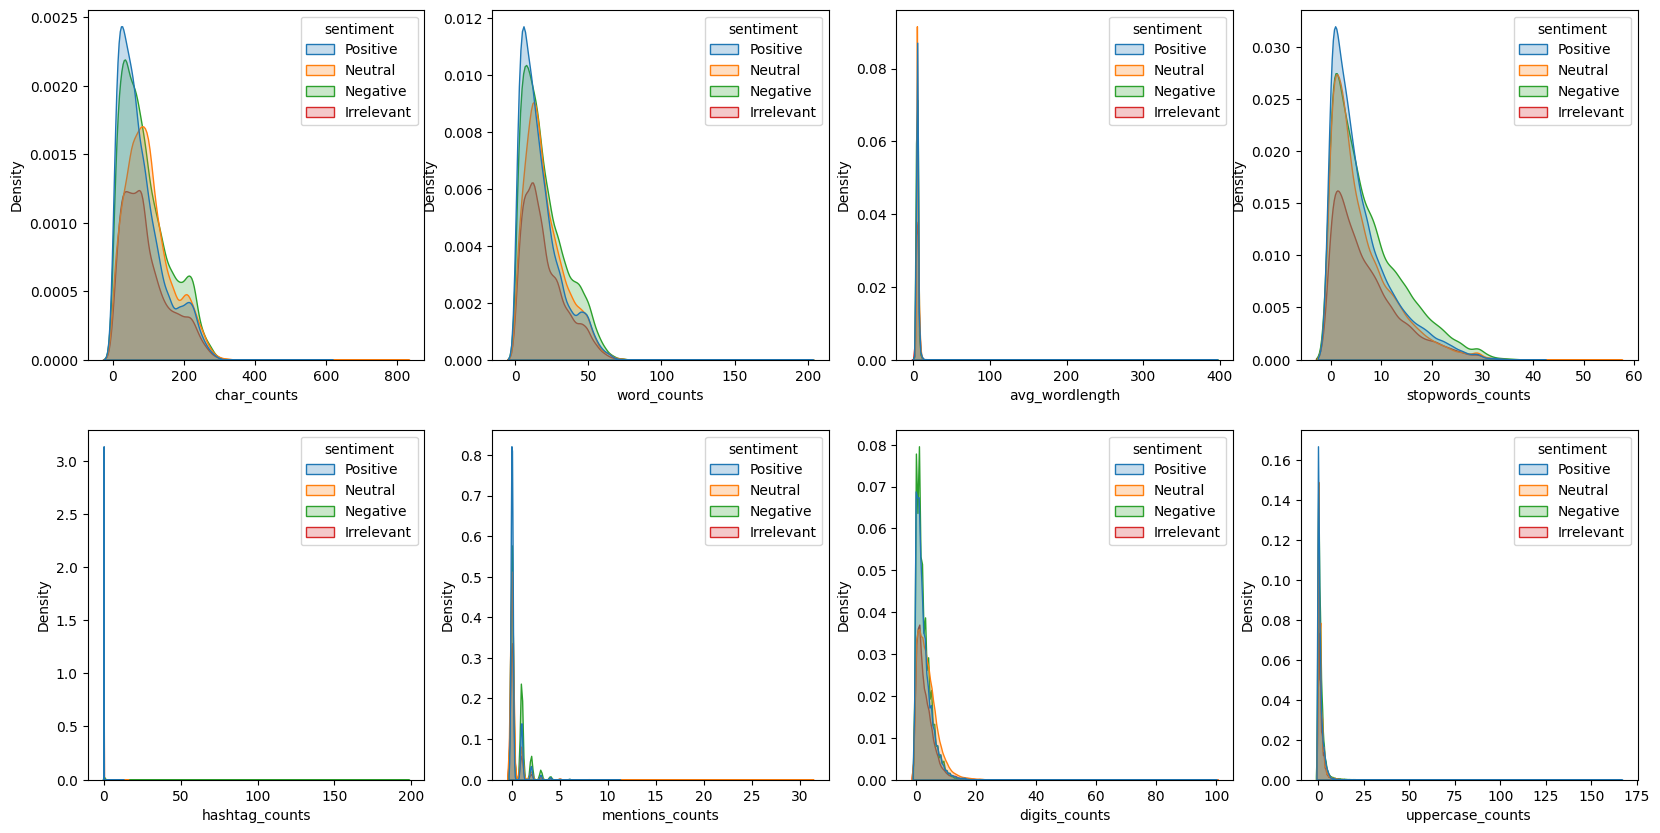

In [ ]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# plot 2x4 grid histogram for each numerical feature
plt.figure(figsize=(20,10))

num_cols = df.select_dtypes(include='number').columns

for col in num_cols:
    plt.subplot(2,4, num_cols.get_loc(col)+1)

    # use sentiment as hue to see the distribution of each numerical feature
    # sns.distplot(df[col], label=col, color='red')
    # sns.histplot(x=col, hue='sentiment', data=df, color='green', bins=100, kde=True)
    sns.kdeplot(data=df, x=col, hue='sentiment', fill=True)

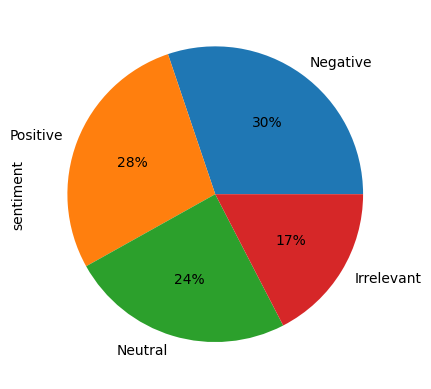

In [ ]:
df['sentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%')

# word cloud
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

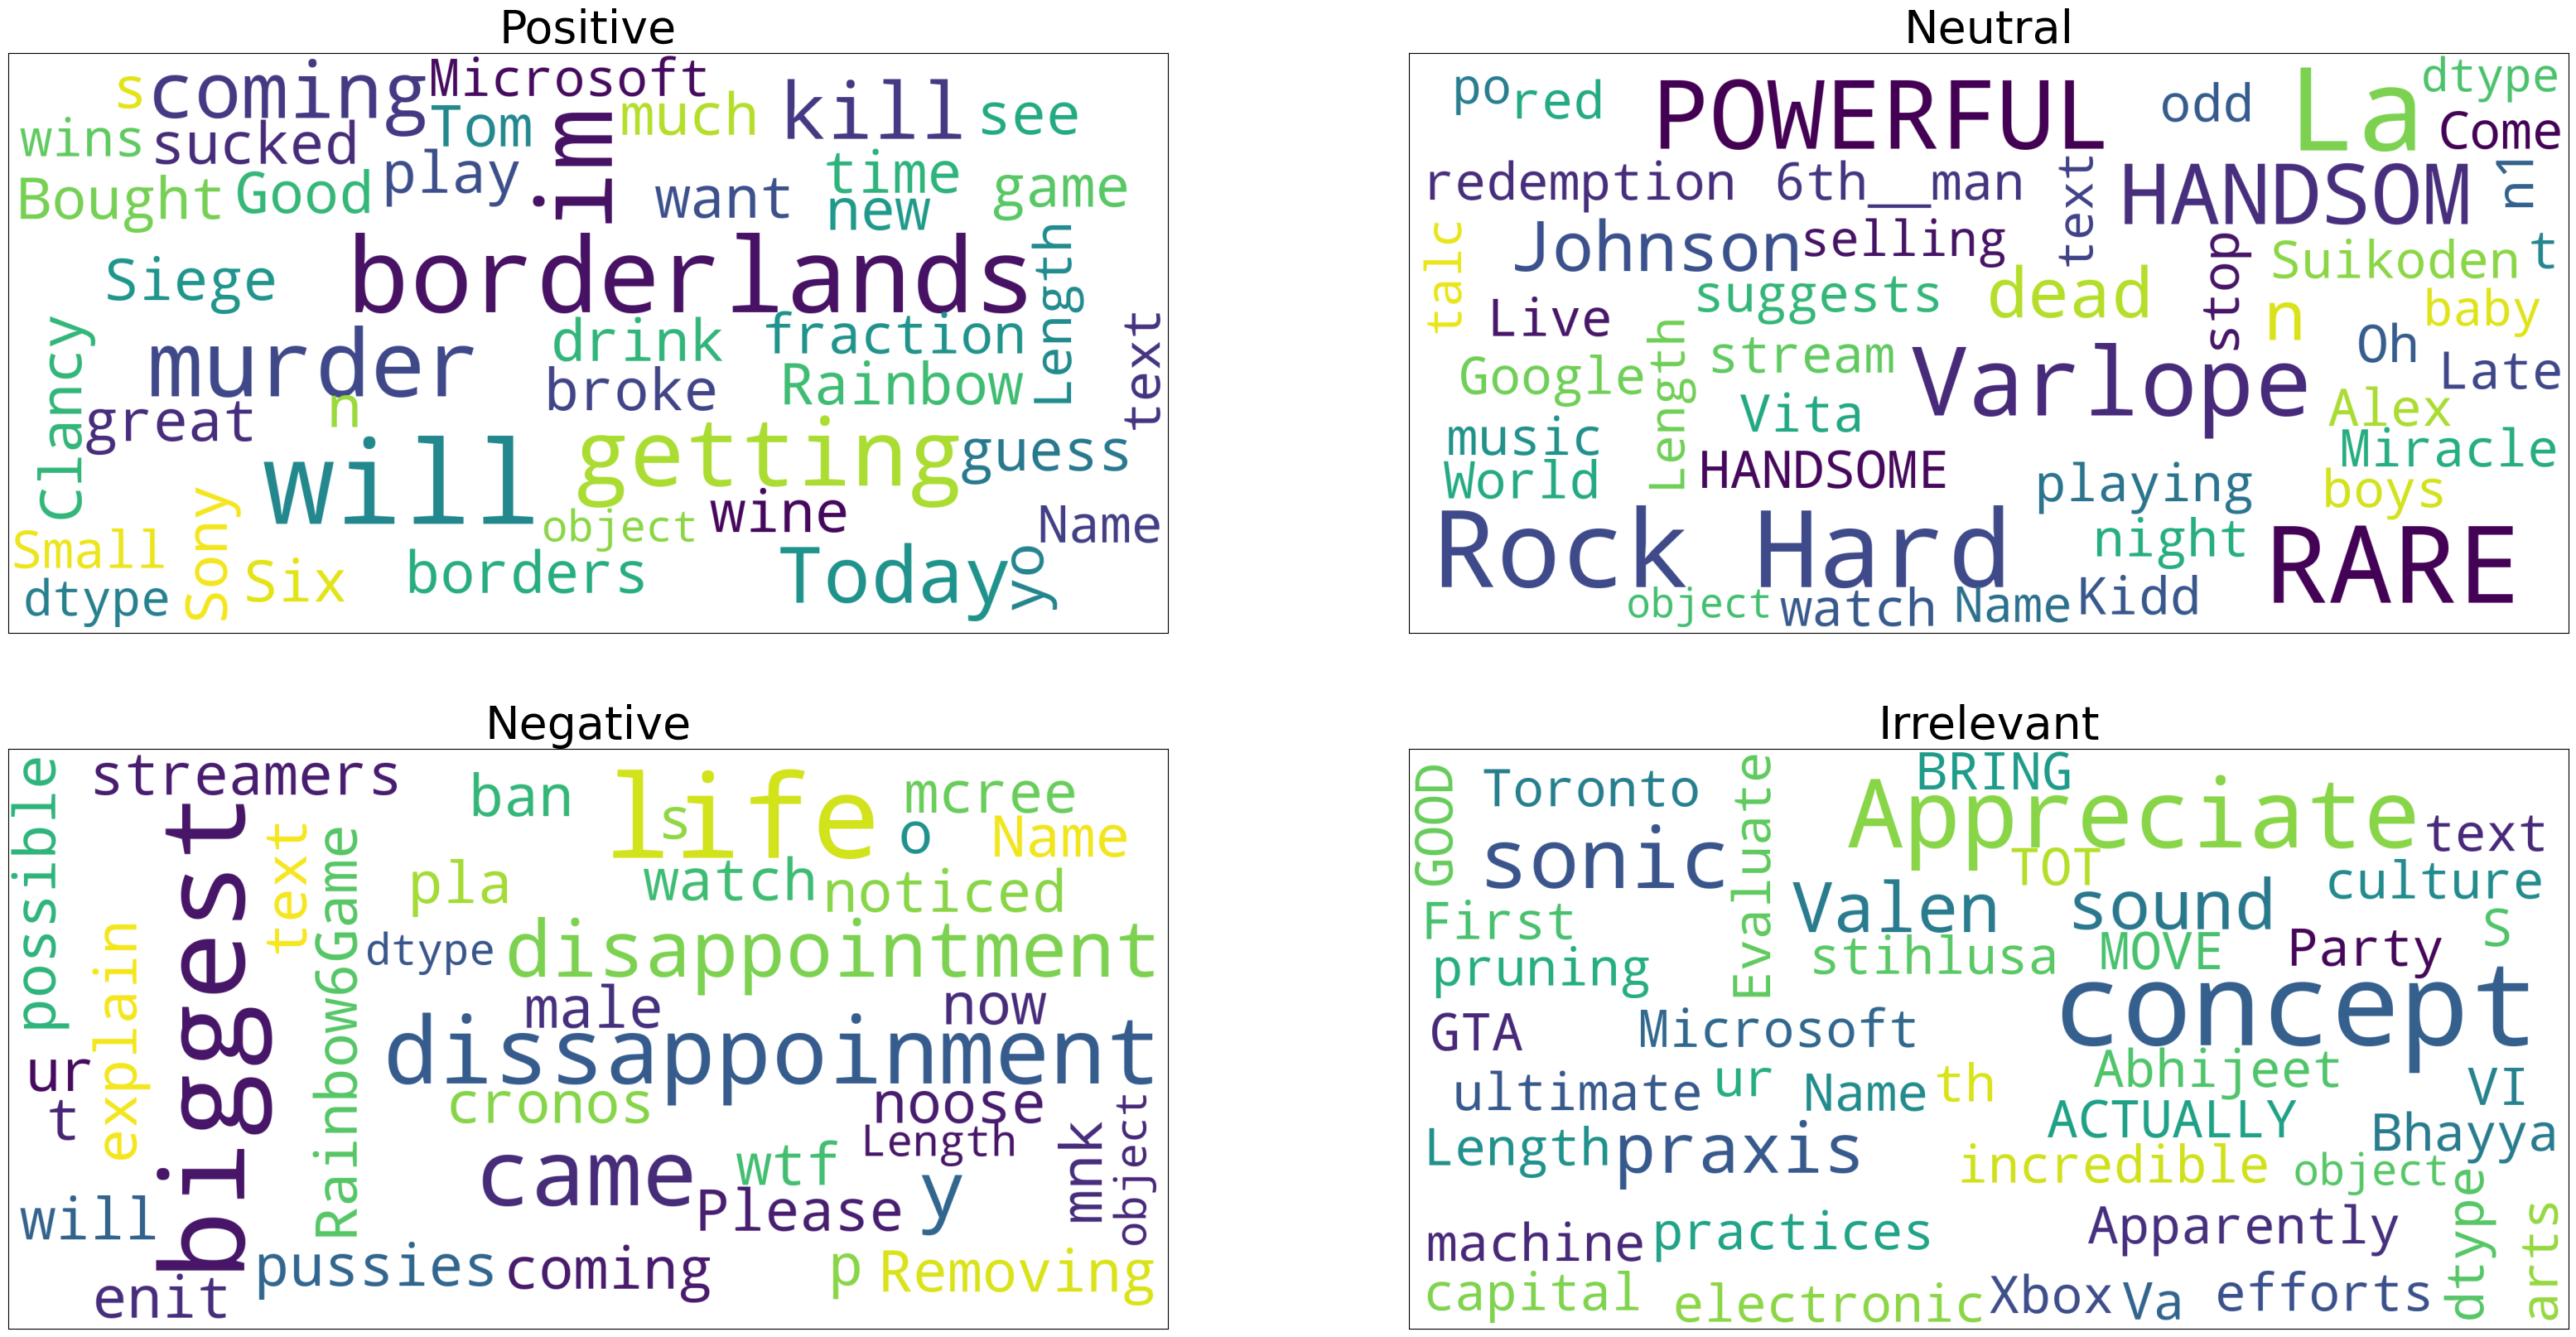

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot 2x2 grid word cloud for each sentiment
plt.figure(figsize=(40,20))

for index, col in enumerate(df['sentiment'].unique()):
    plt.subplot(2,2, index+1)
    # print(col)
    df1 = df[df['sentiment']==col]
    data = df1['text']
    wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=500, max_font_size=40, scale=5).generate(str(data))
    # fig = plt.figure(figsize=(15,15))
    # plt.axis('off')
    # disable ticks
    plt.xticks([])
    plt.yticks([])
    plt.imshow(wordcloud)
    plt.title(col, fontsize=40)

plt.show()
plt.tight_layout()

In [ ]:
# Data Cleaning
# lowercase, remove url, html, punctuations, retweet

df['text'] = df['text'].apply(lambda x: x.lower())
df['text'] = df['text'].apply(lambda x: ps.remove_urls(x))
df['text'] = df['text'].apply(lambda x: ps.remove_html_tags(x))
df['text'] = df['text'].apply(lambda x: ps.remove_special_chars(x))
df['text'] = df['text'].apply(lambda x: ps.remove_rt(x))

In [ ]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)


In [ ]:
X_train.shape, X_test.shape


((59717,), (14930,))

In [ ]:
pip install --upgrade scikit-learn

      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
# model building
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline



In [ ]:
stopwords = ['where', 'during', 'itself', 'no', 'how', 'down', 'shall', 'in', 'or', 'he', 'been', 'about', 'each', 'i', "weren't", 'does', 'all', 'more', 'theirs', "wasn't", "you'll", "shouldn't", 'k', "i've", 'out', 'after', 'and', 'there', 'through', 'can', 'on', 'while', "where's", "she'd", 'only', "there's", 'from', 'yours', 'up', "let's", 'is', "hasn't", 'too', 'therefore', "isn't", 'ourselves', 'was', 'that', 'yourself', "haven't", "they're", 'here', "mustn't", 'against', "it's", 'they', 'until', "that's", 'very', "didn't", 'other', 'nor', 'for', 'the', 'own', 'has', 'over', 'being', 'to', "why's", 'our', "we'd", 'at', 'again', 'between', "when's", 'cannot', 'these', "we've", 'like', 'any', "here's", 'its', 'doing', 'your', 'be', 'r', 'am', 'however', 'because', 'hence', "won't", 'http', "he'd", 'are', 'else', 'we', "how's", 'had', 'ours', 'below', 'into', 'her', 'an', 'since', 'just', "they'd", 'once', 'do', 'which', 'with', "he's", 'this', 'their', 'but', 'ever', 'also', 'him', "who's", 'whom', "you'd", 'those', "aren't", 'when', 'as', "she'll", 'some', 'by', 'would', 'not', "don't", 'a', 'did', "can't", "he'll", 'of', 'so', 'further', 'under', "hadn't", 'were', 'www', 'having', 'herself', 'before', 'ought', "i'd", 'then', 'yourselves', 'have', 'who', 'otherwise', 'such', "wouldn't", "couldn't", 'get', "shan't", 'what', "doesn't"]

# Then use it in your TfidfVectorizer
clf = Pipeline([('tfidf', TfidfVectorizer(stop_words=stopwords)), ('rfc', RandomForestClassifier(n_estimators=100, n_jobs=-1))])


In [ ]:
clf = Pipeline([('tfidf', TfidfVectorizer(stop_words=stopwords)), ('rfc', RandomForestClassifier(n_estimators=100, n_jobs=-1))])
clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['where', 'during', 'itself', 'no',
                                             'how', 'down', 'shall', 'in', 'or',
                                             'he', 'been', 'about', 'each', 'i',
                                             "weren't", 'does', 'all', 'more',
                                             'theirs', "wasn't", "you'll",
                                             "shouldn't", 'k', "i've", 'out',
                                             'after', 'and', 'there', 'through',
                                             'can', ...])),
                ('rfc', RandomForestClassifier(n_jobs=-1))])

In [ ]:
from sklearn.metrics import accuracy_score

predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.9138647019423979


In [ ]:
clf.predict(['im proud of u'])

array(['Positive'], dtype=object)

In [ ]:
clf.predict(['you are fool'])

array(['Negative'], dtype=object)

In [ ]:
# save model
import pickle

pickle.dump(clf, open('twitter_sentiment.pkl', 'wb'))

In [ ]:
X_test.tolist()[:20]

['add 4 callofduty and in roguecompany now teams o and everyone plays under play _ pso2 or ghostrecon i am also one of the best grovers in paladinsgame and best junkrat or mccree in overwatchleague dont forget best vulcan in smitegame i play destinythegame and fortnitegame',
 'tmobile you guys kids are really very slow in tuba star city az makes people go to google verizon',
 'i will make google top ranking high quality seo backlinks fiverrcom share nwewvp',
 'i know a guy whos tablet crashes today after 10 years he tried to fix it without google videos and plugging the tv into a different outlet no luck',
 'eamaddennfl movement is incredible',
 'internship manager',
 'bgs not in first by hearthstonebattlegrounds gameforcejphearthstonee3',
 'almost 2 years after launch and 3 cancelled season later bfv still now have game same in mp even though its fully functional in ghost campaign touche beyond every wire putting one nail in the coffin at a time',
 'so wait horses arthura poo hahaha s

In [ ]:
# install streamlit: pip install streamlit
# run: streamlit run app.py

In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 92.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.7 MB/s eta 0:00:00
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 7.0.0
    Uninstalling importlib-metadata-7.0.0:
      Successfully uninstalled importlib-metadata-7.0.0


In [ ]:
 %%writefile app.py
# install streamlit: pip install streamlit
# run: streamlit run app.py

import streamlit as st
import pickle
import time

# load the model
model = pickle.load(open('twitter_sentiment.pkl', 'rb'))

st.title('Twitter Sentiment Analysis')

tweet = st.text_input('Enter your tweet')

submit = st.button('Predict')


if submit:
    start = time.time()
    prediction = model.predict([tweet])
    end = time.time()
    st.write('Prediction time taken: ', round(end-start, 2), 'seconds')

    print(prediction[0])
    st.write(prediction[0])
    if prediction[0]=="Negative":
        st.write('Plse!.... Dont pass Bad comments..It comes under CyberBullying')



Writing app.py


In [ ]:
! pip install streamlit -q

In [ ]:
!wget -q -O - ipv4.icanhazip.com

35.236.162.162


In [ ]:
! streamlit run app.py & npx localtunnel --port 8051

[..................] \ fetchMetadata: sill resolveWithNewModule localtunnel@2.0


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.236.162.162:8501

npx: installed 22 in 2.886s
your url is: https://quiet-pumas-beg.loca.lt
